# Telecomunication Customer Churn

## Business Problem Understanding

**Context**  
Sebuah perusahaan yang bergerak di bidang telekomunikasi memiliki data yang mewakili profil pelanggan yang telah meninggalkan perusahaan telekomunikasi. Peralihan layanan telekomunikasi dan layanan berbasis langganan lainnya berarti situasi ketika pelanggan meninggalkan penyedia layanan.

Target :

Yes : Meninggalkan penyedia langganan

No : Tidak meninggalkan penyedia langganan

**Problem Statement :**

Jika customer meninggalkan penyedia langganan, perusahaan telekomunikasi akan kehilangan pemasukannya dan perlu biaya, waktu, dan usaha untuk menggantikan pelanggan yang meninggalkan penyedia pelanggan. 

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan telekomunikasi ingin memprediksi kemungkinan seorang customer yang akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

Dan juga, perusahaan ingin mengetahui faktor apa yang membuat seorang customer akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan customer akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer akan meninggalkan penyedia langganan perusahaan tersebut atau tidak.

**Metric Evaluation**

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya, waktu dan usaha (cost promosi 12 USD)

Type 2 error : False Negative  
Konsekuensi: kehilangan pemasukkan jadi tidak terduga dan lebih besar daripada yang sudah pasti meninggalkan penyedia langganan (hilang pemasukan rata-rata 60 USD)

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mencegah kehilangan pemasukkan perusahaan tersebut dan meminimalisir pengeluaran untuk mencari pelanggan baru. Jadi nanti metric utama yang akan kita gunakan adalah F2 Score.

## Data Understanding

- `Dependents` - Customer memiliki tanggungan atau tidak
- `Tenure` - Lamanya customer tetap di perusahaan (bulan)
- `OnlineSecurity` - Customer memiliki keamanam online atau tidak
- `OnlineBackup` - Customer memiliki Back up online atau tidak
- `InternetService` - Penyedia layanan internet customer
- `DeviceProtection` - Customer memiliki perlindungan perangkat atau tidak
- `TechSupport` - Customer memiliki dukungan teknis atau tidak
- `Contract` - Jenis kontrak berdasarkan durasi
- `PaperlessBilling` - Tagihan diterbitkan dalam bentuk paperless
- `MonthlyCharges` - Jumlah biaya layanan per bulan
- `Churn` - Customer meninggalkan atau tidak

In [60]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.pipeline import Pipeline

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import  XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, PrecisionRecallDisplay, fbeta_score
from sklearn.feature_selection import SelectKBest

# Imbalance Dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

import pickle

In [61]:
#Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


Data terdiri dari 4930 baris dan 11 kolom

In [62]:
# jumlah data terisi and datatype tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Tidak ada missing values

In [63]:
df.duplicated().sum()

77

Ada 77 duplikasi data

## Data Cleaning

Drop duplikasi data

In [64]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(4853, 11)

In [65]:
df_deskripsi = df.describe().T
df_deskripsi

,count,mean,std,min,25%,50%,75%,max
tenure,4853.0,32.679992,24.395554,0.0,9.00,29.0,56.00,72.00
MonthlyCharges,4853.0,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65


In [66]:
df_deskripsi['IQR'] = df_deskripsi['75%'] - df_deskripsi['25%']
df_deskripsi['Lower'] = df_deskripsi['25%'] - 1.5*df_deskripsi['IQR']
df_deskripsi['Upper'] = df_deskripsi['75%'] + 1.5*df_deskripsi['IQR']
df_deskripsi['Outlier'] = [df[(df['tenure'] < df_deskripsi['Lower']['tenure']) | (df['tenure'] > df_deskripsi['Upper']['tenure'])]['tenure'].count(),
                           df[(df['MonthlyCharges'] < df_deskripsi['Lower']['MonthlyCharges']) | (df['MonthlyCharges'] > df_deskripsi['Upper']['MonthlyCharges'])]['MonthlyCharges'].count()]
df_deskripsi

,count,mean,std,min,25%,50%,75%,max,IQR,Lower,Upper,Outlier
tenure,4853.0,32.679992,24.395554,0.0,9.00,29.0,56.00,72.00,47.0,-61.50,126.50,0
MonthlyCharges,4853.0,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65,50.0,-34.95,165.05,0


Tidak ada outlier

Data setelah cleaning

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 417.2+ KB


data terdiri dari 4853 baris dan 11 kolom

In [68]:
df['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [69]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [70]:
df['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [71]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [72]:
df['DeviceProtection'].unique()

array(['Yes', 'No internet service', 'No'], dtype=object)

In [73]:
df['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [74]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [75]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

di kolom OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport ada value "No internet service". Dapat direplace dengan "No". No internet service dan no artinya sama

In [77]:
df['OnlineSecurity'].replace('No internet service','No', inplace=True)
df['OnlineBackup'].replace('No internet service','No', inplace=True)
df['DeviceProtection'].replace('No internet service','No', inplace=True)
df['TechSupport'].replace('No internet service','No', inplace=True)

In [78]:
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [79]:
df['OnlineBackup'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df['DeviceProtection'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
df['TechSupport'].unique()

array(['Yes', 'No'], dtype=object)

## EDA

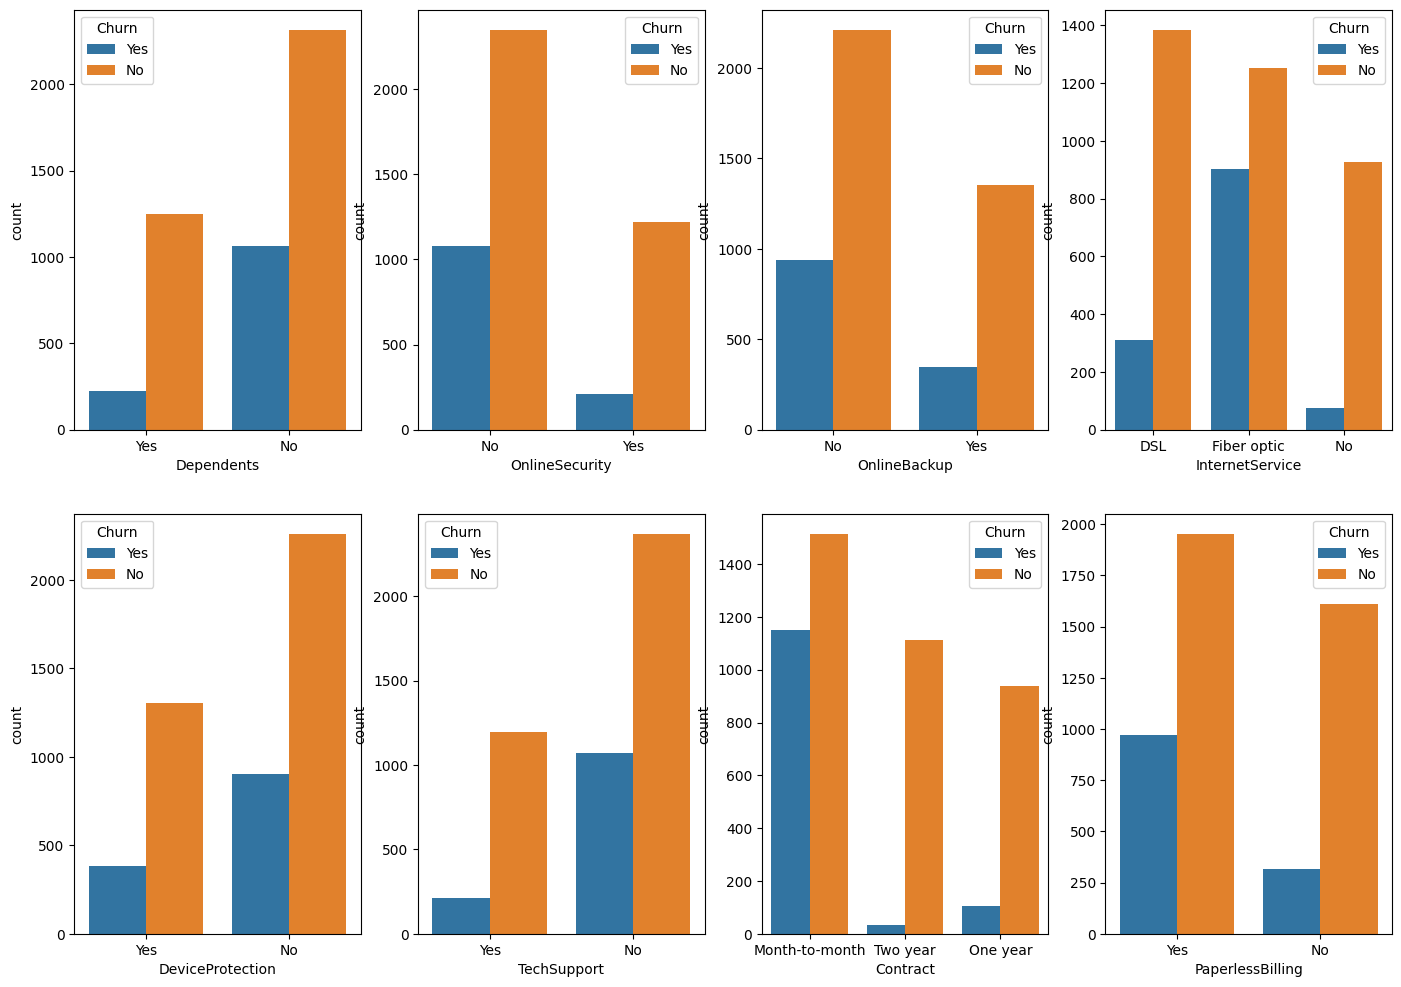

In [82]:
plt.figure(figsize=(17,12))

plt.subplot(241)
sns.countplot(data=df,x='Dependents',hue='Churn');

plt.subplot(242)
sns.countplot(data=df,x='OnlineSecurity',hue='Churn');

plt.subplot(243)
sns.countplot(data=df,x='OnlineBackup',hue='Churn');

plt.subplot(244)
sns.countplot(data=df,x='InternetService',hue='Churn');

plt.subplot(245)
sns.countplot(data=df,x='DeviceProtection',hue='Churn');

plt.subplot(246)
sns.countplot(data=df,x='TechSupport',hue='Churn');

plt.subplot(247)
sns.countplot(data=df,x='Contract',hue='Churn');

plt.subplot(248)
sns.countplot(data=df,x='PaperlessBilling',hue='Churn');
plt.show()

Yang berpotensi meninggalkan penyedia langganan adalah yang tidak memiliki tanggungan (Dependents), keamanan online (OnlineSecurity), back up online, perlindungan perangkat (DeviceProtection), dan dukungan teknis (TechSupport); Layanan internet menggunakan fiber optic, kontrak bulanan, dan menggunakan tagihan paperless.

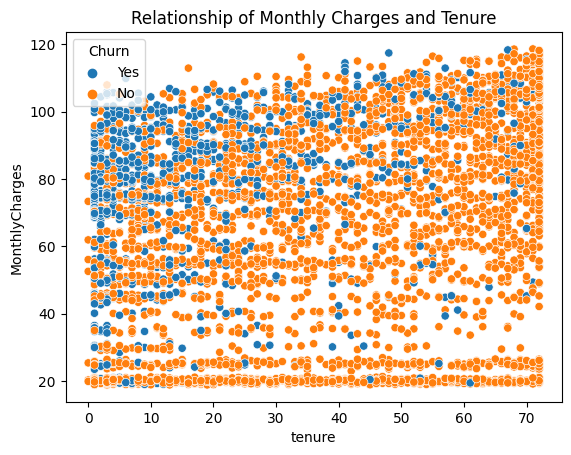

In [83]:
sns.scatterplot(data=df, 
                x='tenure',
                y='MonthlyCharges',
                hue='Churn');
plt.title('Relationship of Monthly Charges and Tenure');

- Yang berpotensi meninggalkan penyedia langganan adalah customer dengan biaya layanan di atas 20 dollar per bulan
- Semakin pendek tenure, customer churn semakin banyak
- Tidak ada korelasi antara biaya layanan per bulan dengan lamanya customer tetap di perusahaan

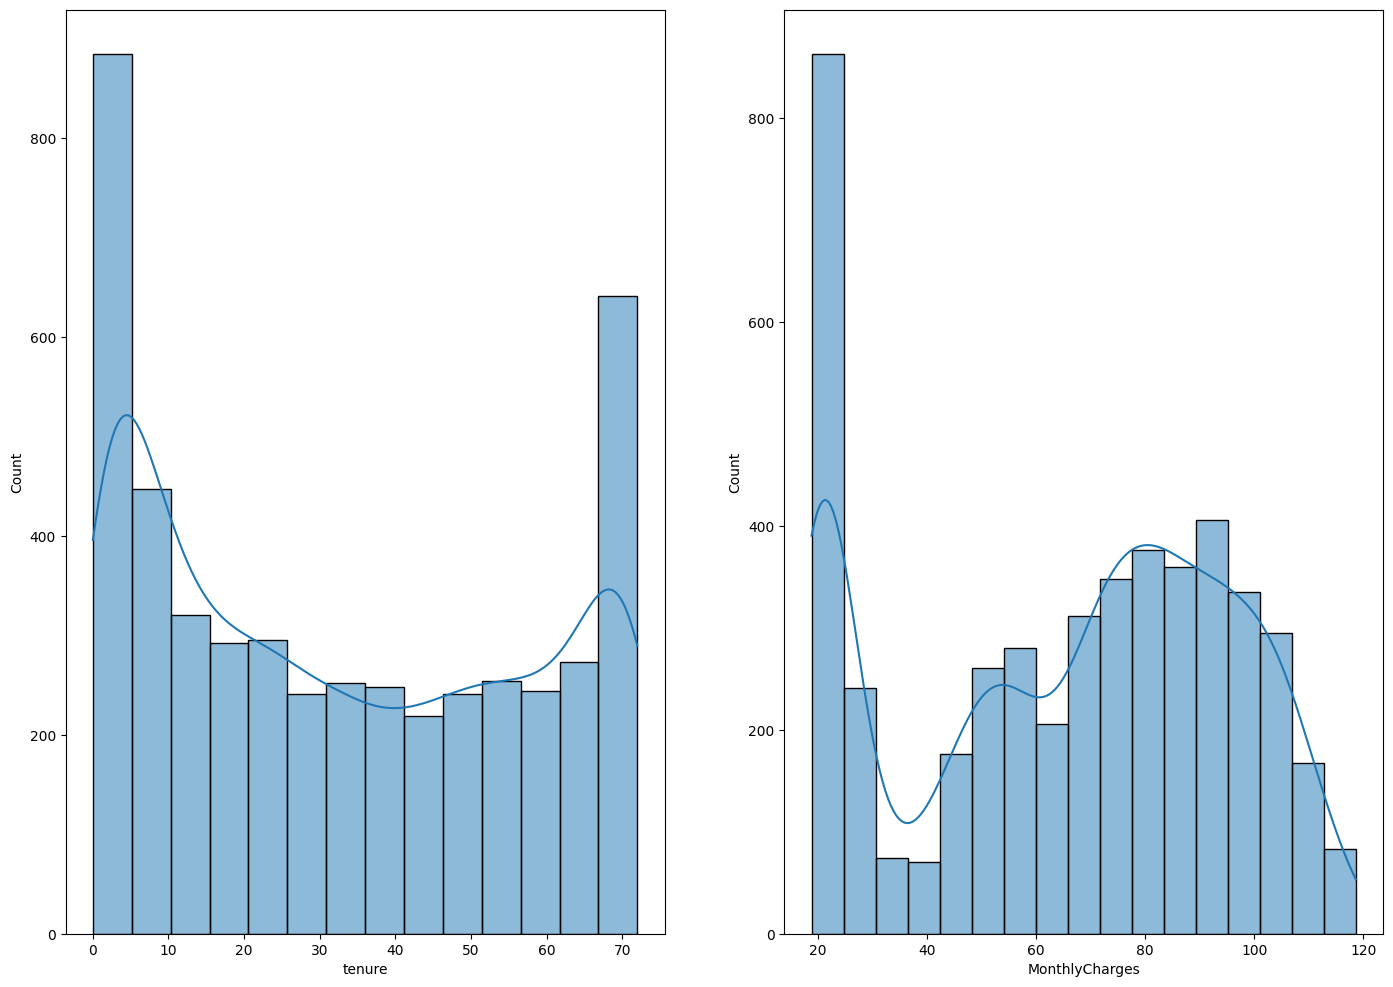

In [84]:
plt.figure(figsize=(17,12))

plt.subplot(121)
sns.histplot(data=df, x='tenure', kde=True);

plt.subplot(122)
sns.histplot(data=df, x='MonthlyCharges', kde=True);
plt.show()

Distribusi data tenure dan MonthlyCharges tidak normal 

## Data Preprocessing

In [85]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,No


In [86]:
X = df.drop(columns='Churn')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

Berdasarkan EDA yang dibuat, semua feature berpengaruh pada Churn. Sehingga, feature tersebut dipakai semuanya. 

In [87]:
y.value_counts() / len(y)
# imbalance

Churn
No     0.734597
Yes    0.265403
Name: count, dtype: float64

In [88]:
print('X shape\t\t:', X.shape)
print('y shape\t\t:', y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (4853, 10)
y shape		: (4853,)

X_train shape	: (3882, 10)
y_train shape	: (3882,)

X_test shape	: (971, 10)
y_test shape	: (971,)


In [89]:
label = LabelEncoder()

label.fit(y_train)

y_train_encode = label.transform(y_train)
y_test_encode = label.transform(y_test)

In [90]:
label.classes_

array(['No', 'Yes'], dtype=object)

In [91]:
print(y_train[:5].values)
print(y_train_encode[:5])

['No' 'No' 'No' 'No' 'Yes']
[0 0 0 0 1]


Pada kolom Churn, value Yes diencode menjadi 1, sedangkan No menjadi 0

In [92]:
onehot = OneHotEncoder(sparse=False, drop='if_binary')
minmaxscaler = scaler = MinMaxScaler()

In [93]:
transformer = ColumnTransformer([
    ('onehot', onehot, ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport',
                        'Contract', 'PaperlessBilling']),
    ('minmaxscaler', minmaxscaler, ['tenure', 'MonthlyCharges'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='if_binary', sparse=False),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges'])])

In [94]:
# fit to X_train only
transformer.fit(X_train)

# transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

In [95]:
X_train.shape

(3882, 10)

In [96]:
X_train_prep.shape

(3882, 14)

In [97]:
X_train_prep

array([[0.        , 1.        , 1.        , ..., 1.        , 0.93055556,
        0.32198297],
       [1.        , 1.        , 1.        , ..., 0.        , 0.98611111,
        0.66750125],
       [0.        , 0.        , 0.        , ..., 1.        , 0.20833333,
        0.07561342],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.08333333,
        0.36404607],
       [1.        , 0.        , 1.        , ..., 1.        , 0.06944444,
        0.61442163],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.67701552]])

In [98]:
X_train_prep_df = pd.DataFrame(X_train_prep)
X_train_prep_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.930556,0.321983
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.986111,0.667501
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.208333,0.075613
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.430556,0.707561
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.500000,0.653981


In [99]:
X_test_prep_df = pd.DataFrame(X_test_prep)
X_test_prep_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.208333,0.644967
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.598398
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.791688
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.250000,0.268903
4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.939409


In [100]:
transformer.get_feature_names_out()

array(['onehot__Dependents_Yes', 'onehot__OnlineSecurity_Yes',
       'onehot__OnlineBackup_Yes', 'onehot__InternetService_DSL',
       'onehot__InternetService_Fiber optic',
       'onehot__InternetService_No', 'onehot__DeviceProtection_Yes',
       'onehot__TechSupport_Yes', 'onehot__Contract_Month-to-month',
       'onehot__Contract_One year', 'onehot__Contract_Two year',
       'onehot__PaperlessBilling_Yes', 'minmaxscaler__tenure',
       'minmaxscaler__MonthlyCharges'], dtype=object)

In [101]:
X_train_prep_df.columns = transformer.get_feature_names_out()
X_train_prep_df

,onehot__Dependents_Yes,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_Yes,onehot__InternetService_DSL,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_Yes,onehot__TechSupport_Yes,onehot__Contract_Month-to-month,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes,minmaxscaler__tenure,minmaxscaler__MonthlyCharges
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.930556,0.321983
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.986111,0.667501
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.208333,0.075613
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.430556,0.707561
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.500000,0.653981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.583333,0.010015
3878,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.250000,0.310966
3879,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.083333,0.364046
3880,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.069444,0.614422


In [102]:
X_test_prep_df.columns = transformer.get_feature_names_out()
X_test_prep_df

,onehot__Dependents_Yes,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_Yes,onehot__InternetService_DSL,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_Yes,onehot__TechSupport_Yes,onehot__Contract_Month-to-month,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes,minmaxscaler__tenure,minmaxscaler__MonthlyCharges
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.208333,0.644967
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.598398
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.791688
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.250000,0.268903
4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,0.939409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.058087
967,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.708333,0.801703
968,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.750000,0.264397
969,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.013889,0.010516


Untuk encoding, menggunakan one-hot encoding karena feature tidak ada urutan dan jumlah unique value pada kolom kategorikal sedikit. Apabila feature hanya memiliki 2 kategori, 1 kategori didrop untuk menghindari multicollinearities dan kolom yang berlebihan.

Untuk scaling, menggunakan min-max scaling karena distribusi data pada feature kolom numerikal tidak normal

## Modeling & Evaluation

In [103]:
logreg = LogisticRegression(max_iter=1000, random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

In [104]:
f2 = make_scorer(fbeta_score, beta=2) 

### Default Parameter

In [105]:
models = [logreg, knn, dt, rf, gboost, adaboost, xgboost]

cv_mean = []
cv_std = []
cv_all = []

resampler = SMOTE(random_state=0)

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for i in models:

    model_pipe = Pipeline([
        ('prep', transformer),
        ('resampler', resampler),
        ('model', i)])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train_encode, 
        cv = 5, 
        scoring = f2,
        error_score='raise'
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [106]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,"LogisticRegression(max_iter=1000, random_state=0)",0.701984,0.017375,"[0.6772, 0.7217, 0.6936, 0.6955, 0.7219]"
1,KNeighborsClassifier(),0.616672,0.010812,"[0.6239, 0.6036, 0.6059, 0.6323, 0.6176]"
2,DecisionTreeClassifier(random_state=0),0.551971,0.023665,"[0.5863, 0.5566, 0.5638, 0.5357, 0.5174]"
3,RandomForestClassifier(random_state=0),0.590572,0.018725,"[0.6173, 0.6029, 0.563, 0.5792, 0.5905]"
4,GradientBoostingClassifier(random_state=0),0.687911,0.021835,"[0.6603, 0.6869, 0.6769, 0.7266, 0.6889]"
5,AdaBoostClassifier(random_state=0),0.718751,0.021492,"[0.6822, 0.7396, 0.7068, 0.7352, 0.73]"
6,"XGBClassifier(base_score=None, booster=None, c...",0.617944,0.023183,"[0.6008, 0.6197, 0.6015, 0.6623, 0.6055]"


Model terbaik Adaboost

## Hyperparameter Tuning

Tuning Adaboost

In [107]:
hyperparam = {
    'model__n_estimators': range(50,53),
    'model__learning_rate':[0.9, 1, 1.1],
    'model__algorithm': ['SAMME', 'SAMME.R'],
    'resampler': [
        SMOTE(random_state=0),
        NearMiss()]
}

model_pipe = Pipeline([
        ('prep', transformer),
        ('resampler', resampler),
        ('model', adaboost)])

# gridsearch
gs = GridSearchCV(estimator = model_pipe,
             param_grid = hyperparam,
             cv = 5,
             scoring=f2,
             n_jobs=-1,
             error_score='raise')

In [108]:
gs.fit(X_train, y_train_encode)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       sparse=False),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'Contract',
                                                                          'PaperlessBilling']),
                                                                        ('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges'])])),
                                       ('resampler', SMOTE(random_state=0)),
                                       ('model',
                                        AdaBoostClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__learning_rate': [0.9, 1, 1.1],
                         'model__n_estimators': range(50, 53),
                         'resampler': [SMOTE(random_state=0), NearMiss()]},
             scoring=make_scorer(fbeta_score, beta=2))

In [109]:
gs.best_score_

0.7268092995979591

In [110]:
gs.best_params_

{'model__algorithm': 'SAMME',
 'model__learning_rate': 0.9,
 'model__n_estimators': 51,
 'resampler': SMOTE(random_state=0)}

In [111]:
gs.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('resampler', SMOTE(random_state=0)),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9,
                                    n_estimators=51, random_state=0))])

In [112]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__learning_rate,param_model__n_estimators,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.532142,0.010557,0.035770,0.002580,SAMME,0.9,51,SMOTE(random_state=0),"{'model__algorithm': 'SAMME', 'model__learning...",0.708080,0.744589,0.715525,0.734783,0.731070,0.726809,0.013236,1
4,0.547910,0.016631,0.035332,0.001462,SAMME,0.9,52,SMOTE(random_state=0),"{'model__algorithm': 'SAMME', 'model__learning...",0.709930,0.744589,0.713668,0.724956,0.731707,0.724970,0.012524,2
0,0.535549,0.011559,0.036713,0.002036,SAMME,0.9,50,SMOTE(random_state=0),"{'model__algorithm': 'SAMME', 'model__learning...",0.709312,0.744589,0.703057,0.724956,0.731707,0.722724,0.015036,3
20,0.594021,0.006971,0.044408,0.001610,SAMME.R,0.9,51,SMOTE(random_state=0),"{'model__algorithm': 'SAMME.R', 'model__learni...",0.686620,0.737847,0.714286,0.731383,0.738786,0.721784,0.019657,4
10,0.548294,0.007572,0.034716,0.002096,SAMME,1,52,SMOTE(random_state=0),"{'model__algorithm': 'SAMME', 'model__learning...",0.692375,0.743945,0.714905,0.723104,0.728070,0.720480,0.016947,5
16,0.551386,0.007908,0.038811,0.004846,SAMME,1.1,52,SMOTE(random_state=0),"{'model__algorithm': 'SAMME', 'model__learning...",0.694076,0.744406,0.715525,0.715540,0.731278,0.720165,0.016939,6
18,0.658265,0.042245,0.050903,0.011902,SAMME.R,0.9,50,SMOTE(random_state=0),"{'model__algorithm': 'SAMME.R', 'model__learni...",0.687831,0.738488,0.709904,0.724382,0.734389,0.718999,0.018438,7
22,0.598200,0.012804,0.041121,0.001687,SAMME.R,0.9,52,SMOTE(random_state=0),"{'model__algorithm': 'SAMME.R', 'model__learni...",0.694200,0.734144,0.709904,0.725664,0.730634,0.718909,0.014878,8
24,0.585243,0.015166,0.045223,0.005072,SAMME.R,1,50,SMOTE(random_state=0),"{'model__algorithm': 'SAMME.R', 'model__learni...",0.682218,0.739619,0.706760,0.735164,0.729991,0.718751,0.021492,9
26,0.601120,0.027486,0.044215,0.004103,SAMME.R,1,51,SMOTE(random_state=0),"{'model__algorithm': 'SAMME.R', 'model__learni...",0.686016,0.740260,0.702371,0.727595,0.731922,0.717633,0.020239,10


Performa model:
- Benchmark model: 0.719
- Hyperparameter tuning: 0.727

## Predict to Test Set

Default Parameter

In [113]:
model = AdaBoostClassifier(random_state=0)

resampler = SMOTE(random_state=0)

model_pipe = Pipeline([
        ('prep', transformer),
        ('resampler', resampler),
        ('model', model)])

model_pipe.fit(X_train, y_train_encode)

y_pred_default = model_pipe.predict(X_test)

fbeta_score(y_test_encode, y_pred_default, beta=2.0)

0.7338483146067416

After Tuning

In [114]:
model = AdaBoostClassifier(random_state=0, n_estimators=51, learning_rate=0.9, algorithm='SAMME')

resampler = SMOTE(random_state=0)

model_pipe = Pipeline([
        ('prep', transformer),
        ('resampler', resampler),
        ('model', model)])

model_pipe.fit(X_train, y_train_encode)

y_pred_tuning = model_pipe.predict(X_test)

fbeta_score(y_test_encode, y_pred_tuning, beta=2.0)

0.7333333333333332

In [115]:
print(fbeta_score(y_test_encode, y_pred_default, beta=2.0), 'default parameter')
print(fbeta_score(y_test_encode, y_pred_tuning, beta=2.0), 'after tuning')

0.7338483146067416 default parameter
0.7333333333333332 after tuning


Setelah tuning, F2 score sedikit menurun

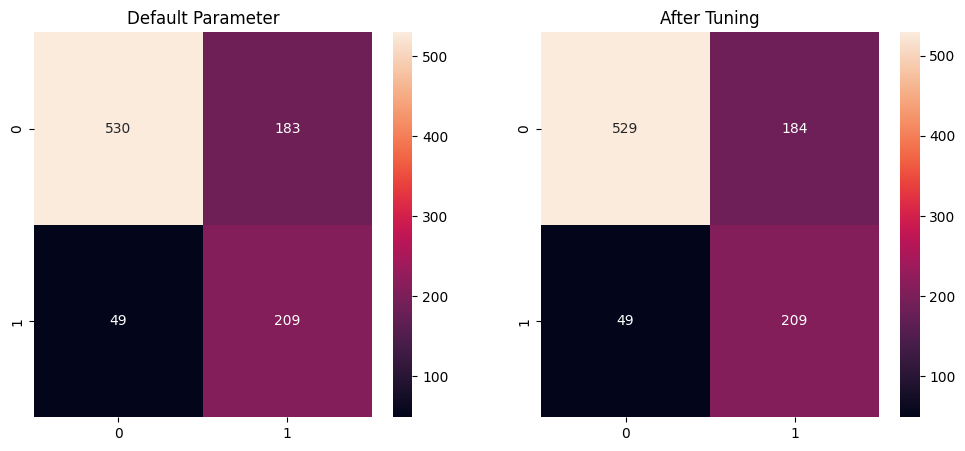

In [116]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_encode, y_pred_default), annot=True, fmt='.0f')
plt.title('Default Parameter')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_encode, y_pred_tuning), annot=True, fmt='.0f');
plt.title('After Tuning');

1 customer yang true negative berubah menjadi false positive

In [117]:
estimator = gs.best_estimator_
estimator.fit(X,y)
pickle.dump(estimator, open('Project 3 Ryan Adhimukti Prayitno.sav', 'wb'))

## Feature Importances

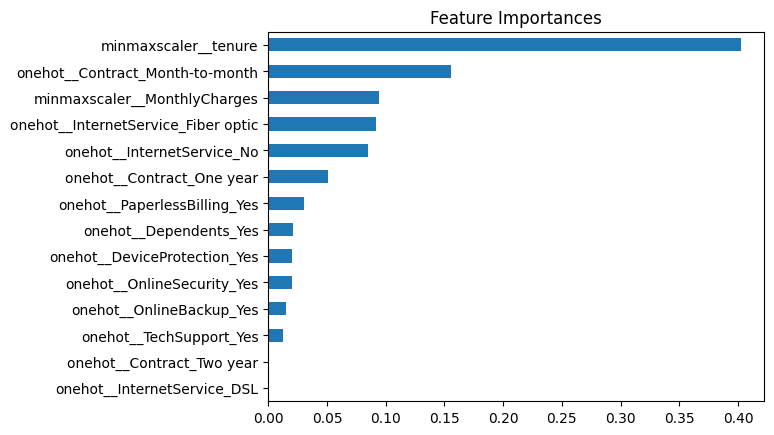

In [118]:
importance = pd.Series(estimator['model'].feature_importances_, index=transformer.get_feature_names_out()).sort_values()
importance.plot(kind='barh', title='Feature Importances')
plt.show()

Feature yang paling menyebabkan customer churn adalah tenure dan kontrak bulanan

## Cost Calculation

Tanpa Model

- Pengeluaran untuk promosi (TP+FP+TN+FN) = 713 x 12 USD = 8556 USD
- Promosi tepat sasaran (TP+FN) = 258 x 12 USD = 3096 USD
- Biaya promosi sia-sia = 8556 USD - 3096 USD = 5460 USD

Dengan Model

- Pengeluaran salah promosi (FP) = 184 x 12 USD = 2208 USD
- Kehilangan customer karena tidak terprediksi tidak churn (FN) = 49 x 60 USD = 2940 USD
- Total kerugian = 2208 USD + 2940 USD = 5148 USD

Menurunkan kerugian sebesar (5460 USD - 5148 USD) / 5460 USD * 100 % = 5.71 % 

## Conclusion

- Model terbaik menggunakan Adaboost yang telah dituning dan dibalance oversampling SMOTE
- Feature yang paling menyebabkan customer churn adalah tenure dan kontrak bulanan
- Dengan F2 Score 73.33 % dan penurunan kerugian sebesar 5.71 %, model machine learning ini cukup membantu perusahaan

## Reccomendation

- Data tambahan seperti layanan telepon, streaming saluran tv, dan streaming film
- Perhatian khusus terhadap customer yang tenure pendek dan kontrak bulanan
- Penawaran menarik bagi customer dengan biaya layanan tinggi